In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['SurveySchema.csv', 'freeFormResponses.csv', 'multipleChoiceResponses.csv']


In [2]:
Survey = pd.read_csv(os.path.join(os.getcwd(), '../input/SurveySchema.csv'))
Free_response = pd.read_csv(os.path.join(os.getcwd(), '../input/freeFormResponses.csv'))
multi_choice = pd.read_csv(os.path.join(os.getcwd(), '../input/multipleChoiceResponses.csv'))

/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (0,2,8,10,21,23,24,25,26,27,28,44,56,64,83,85,87,107,109,123,125,150,157,172,174,194,210,218,219,223,246,249,262,264,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,304,306,325,326,329,341,368,371,384,385,389,390,391,393,394) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
print(f"samples in survey: {len(Survey)}, samples in Free_response: {len(Free_response)}, samples in multiplechoice: {len(multi_choice)}")

samples in survey: 12, samples in Free_response: 23860, samples in multiplechoice: 23860


In [4]:
Free_response.head(10)

,Q11_OTHER_TEXT,Q12_OTHER_TEXT,Q12_Part_1_TEXT,Q12_Part_2_TEXT,Q12_Part_3_TEXT,Q12_Part_4_TEXT,Q12_Part_5_TEXT,Q13_OTHER_TEXT,Q14_OTHER_TEXT,Q15_OTHER_TEXT,Q16_OTHER_TEXT,Q17_OTHER_TEXT,Q18_OTHER_TEXT,Q19_OTHER_TEXT,Q1_OTHER_TEXT,Q20_OTHER_TEXT,Q21_OTHER_TEXT,Q22_OTHER_TEXT,Q27_OTHER_TEXT,Q28_OTHER_TEXT,Q29_OTHER_TEXT,Q30_OTHER_TEXT,Q31_OTHER_TEXT,Q32_OTHER,Q33_OTHER_TEXT,Q34_OTHER_TEXT,Q35_OTHER_TEXT,Q36_OTHER_TEXT,Q37_OTHER_TEXT,Q38_OTHER_TEXT,Q42_OTHER_TEXT,Q49_OTHER_TEXT,Q50_OTHER_TEXT,Q6_OTHER_TEXT,Q7_OTHER_TEXT
0,Select any activities that make up an importan...,What is the primary tool that you use at work ...,What is the primary tool that you use at work ...,What is the primary tool that you use at work ...,What is the primary tool that you use at work ...,What is the primary tool that you use at work ...,What is the primary tool that you use at work ...,Which of the following integrated development ...,Which of the following hosted notebooks have y...,Which of the following cloud computing service...,What programming languages do you use on a reg...,What specific programming language do you use ...,What programming language would you recommend ...,What machine learning frameworks have you used...,What is your gender? - Prefer to self-describe...,Of the choices that you selected in the previo...,What data visualization libraries or tools hav...,Of the choices that you selected in the previo...,Which of the following cloud computing product...,Which of the following machine learning produc...,Which of the following relational database pro...,Which of the following big data and analytics ...,Which types of data do you currently interact ...,What is the type of data that you currently in...,Where do you find public datasets? (Select all...,During a typical data science project at work ...,What percentage of your current machine learni...,On which online platforms have you begun or co...,On which online platform have you spent the mo...,Who/what are your favorite media sources that ...,What metrics do you or your organization use t...,What tools and methods do you use to make your...,What barriers prevent you from making your wor...,Select the title most similar to your current ...,In what industry is your current employer/cont...
1,NaN,NaN,NaN,NaN,NaN,"Jupyter Notebooks, Pycharm, Intelijidea",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,mlcourse.ai,NaN,ods.ai,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,anaconda,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,"Trifacta, Orange",NaN,NaN,NaN,NaN,NaN,NetBeans,Orange,Orange,NaN,NaN,Orange,NaN,NaN,NaN,NaN,NaN,Orange,Orange,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,Python in Notebooks,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,GitHub,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,JupyterLab,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,gcp,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,Jupyterlab,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AWS RDS,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# # Show questions 
# multi_choice.head(1)
# i=0
# for col in multi_choice.columns:
#     i+=1
#     print(f'{col} :', multi_choice[col][0])
# print(multi_choice['Q6'][0])

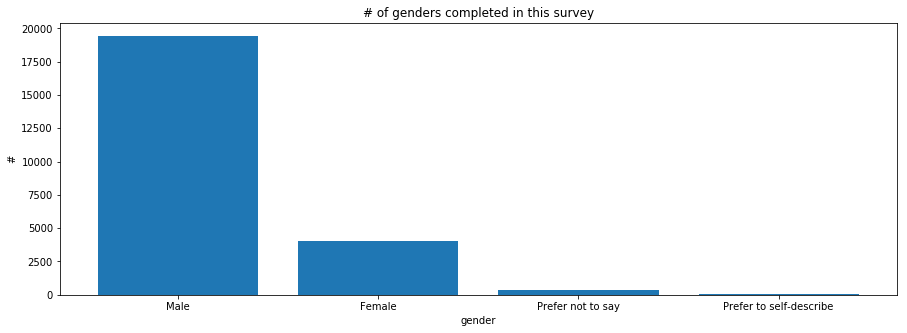

In [7]:
import matplotlib.pyplot as plt
plt.figure(figsize = (15,5))
count = multi_choice['Q1'][1:].value_counts()  # take out of the question title
plt.bar(count.index,count)
plt.title('# of genders completed in this survey')
plt.ylabel('#')
plt.xlabel('gender')
plt.show()

**After this, we clearly see the number of males complete in this survey are around 4 times more than female. Then we want to ask what is the age distribution for males and females?**

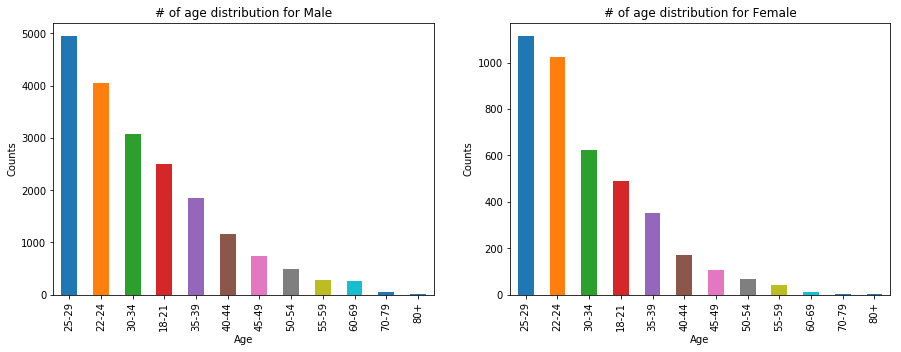

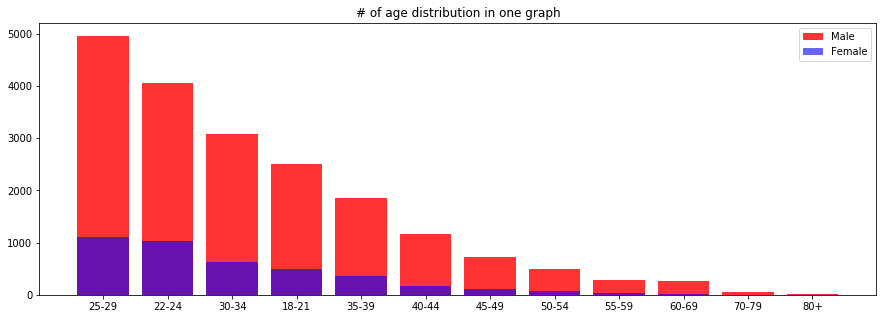

In [8]:
def get_group(data, column='Q1', gender='Male'):
    return data.groupby(column).get_group(gender)
df = multi_choice.drop(0, axis=0)
grouped_male = get_group(df)
grouped_female = get_group(df, gender='Female')
fig, axes = plt.subplots(1,2,figsize=(15,5))
grouped_male['Q2'].value_counts().plot.bar(ax=axes[0], title='# of age distribution for Male')
grouped_female['Q2'].value_counts().plot.bar(ax=axes[1], title='# of age distribution for Female')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Counts')
axes[1].set_xlabel('Age')
axes[1].set_ylabel('Counts')
plt.figure(figsize=(15,5))
plt.bar(grouped_male['Q2'].value_counts().index, grouped_male['Q2'].value_counts(), color='r', alpha=0.8, label='Male')
plt.bar(grouped_female['Q2'].value_counts().index, grouped_female['Q2'].value_counts(), color='b', alpha=0.6, label='Female')
plt.title('# of age distribution in one graph')
plt.legend()
plt.show()

**Then we are concerned about the differences in diploma gained for both genders **

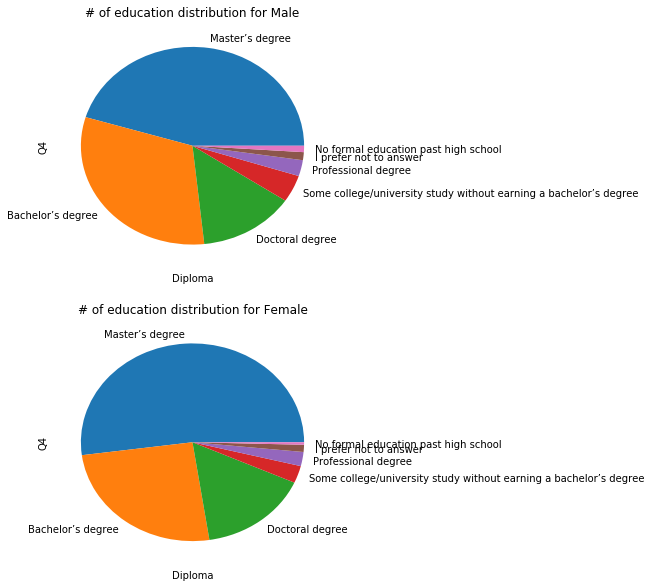

In [9]:
fig, axes = plt.subplots(2,1,figsize=(5,10))
grouped_male['Q4'].value_counts().plot.pie(ax=axes[0], title='# of education distribution for Male')
grouped_female['Q4'].value_counts().plot.pie(ax=axes[1], title='# of education distribution for Female')
axes[0].set_xlabel('Diploma')
# axes[0].set_ylabel('Counts')
axes[1].set_xlabel('Diploma')
# axes[1].set_ylabel('Counts')
plt.show()

**Most of the participators have obtained master's degree both for males and females, then following the bachelor's degree and then doctoral degree. Women own higher partition in master's degree than men. From this, we reason Kaggle competition is a high-level competition for lots of highly educated people**

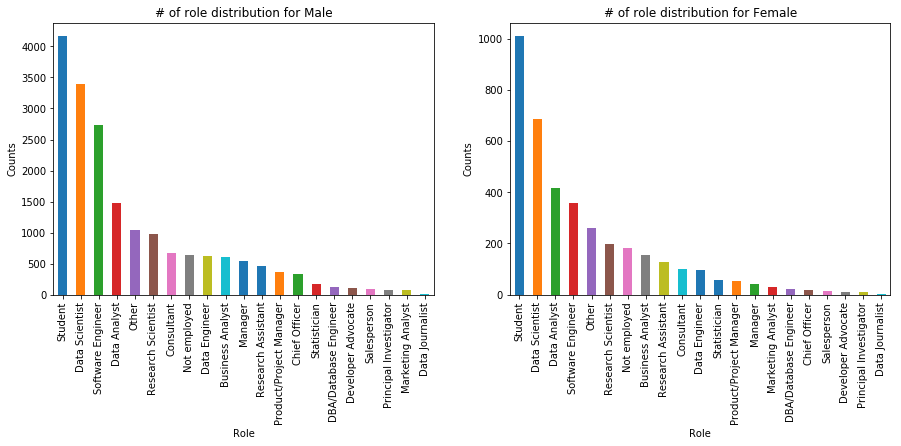

In [10]:
fig, axes = plt.subplots(1,2,figsize=(15,5))
grouped_male['Q6'].value_counts().plot.bar(ax=axes[0], title='# of role distribution for Male')
grouped_female['Q6'].value_counts().plot.bar(ax=axes[1], title='# of role distribution for Female')
axes[0].set_xlabel('Role')
axes[0].set_ylabel('Counts')
axes[1].set_xlabel('Role')
axes[1].set_ylabel('Counts')
plt.show()

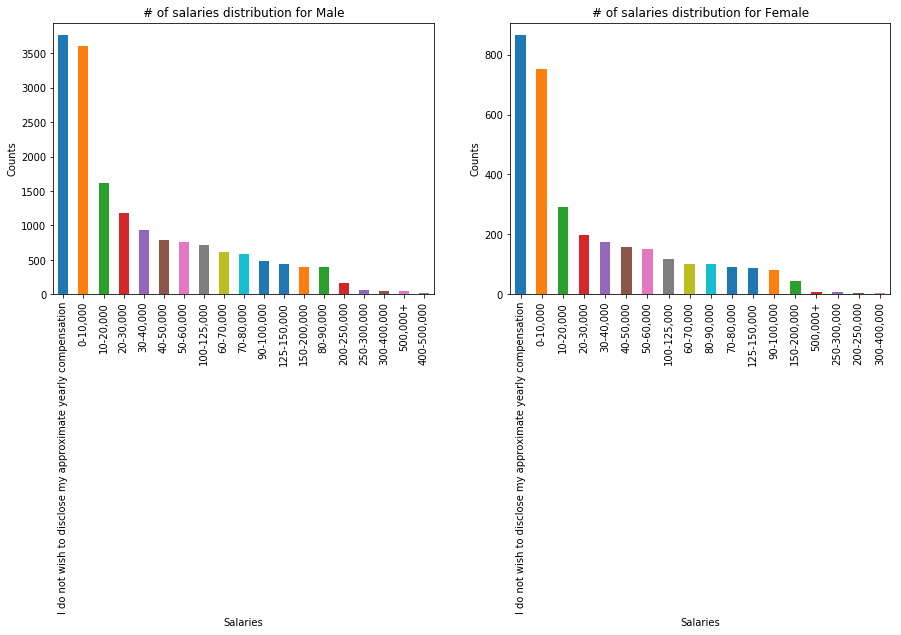

In [11]:
fig, axes = plt.subplots(1,2,figsize=(15,5))
grouped_male['Q9'].value_counts().plot.bar(ax=axes[0], title='# of salaries distribution for Male')
grouped_female['Q9'].value_counts().plot.bar(ax=axes[1], title='# of salaries distribution for Female')
axes[0].set_xlabel('Salaries')
axes[0].set_ylabel('Counts')
axes[1].set_xlabel('Salaries')
axes[1].set_ylabel('Counts')
plt.show()

**Students are so far the most frequent groups using kaggle, we will explore this further after gender. the difference here for the sex is that female have higher portion of data-related work e.g. data scientist, data analytist than male but students are main sources for female**

**As I am a student, I do care about other students who may have the same motivation as me. The next step, I will be exploring this special group, which is the largest group in the Kaggle as well.**

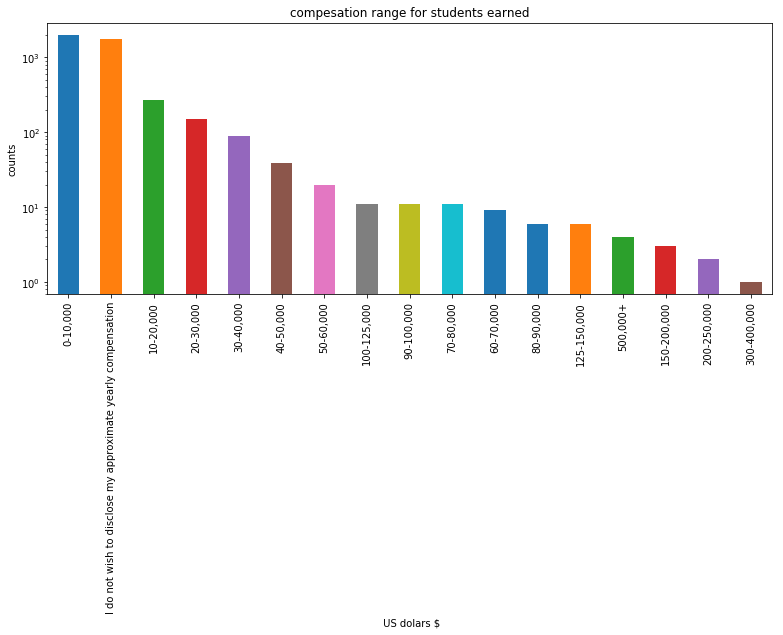

In [12]:
grouped_stu = get_group(multi_choice, 'Q6', 'Student')
# To see the salaries for students, we expect large portition of zeros but we want to know more about those who can earn salaries
# even in their students life
plot, ax = plt.subplots(1,figsize=(13,5))
grouped_stu['Q9'].value_counts().plot.bar(ax=ax)
ax.set_yscale('log')
ax.set_title('compesation range for students earned')
ax.set_xlabel(' US dolars $')
ax.set_ylabel('counts')
plt.show()

** Then we want to know more about the range (10-20,000). I doubt these students gained salaries from the stipend and most of them have to be Ph.D. students**

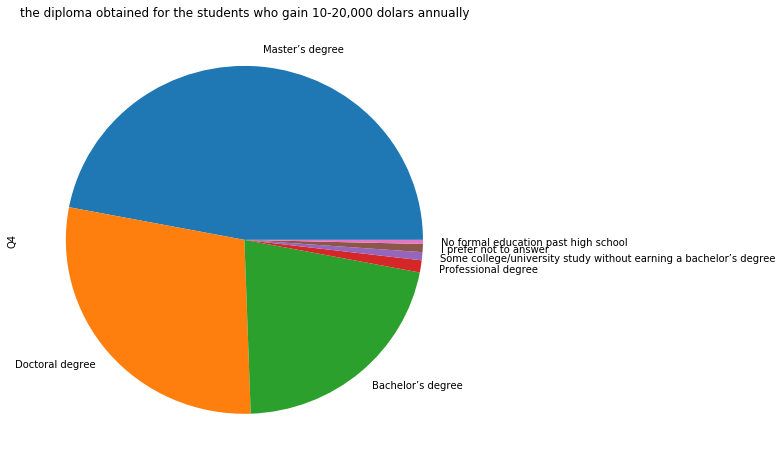

In [13]:
grouped_stu_sal = get_group(grouped_stu, 'Q9', '10-20,000')
# Then we see the highest education this group has gained
plot, ax = plt.subplots(1,figsize=(8,8))
grouped_stu_sal['Q4'].value_counts().plot.pie()
ax.set_title("the diploma obtained for the students who gain 10-20,000 dolars annually")
plt.show()

**not surprisingly, most of them are postgraduate students who may gain stipend from the university, but there are still a number of bachelor student, the next question is how many yrs spent in machine learning ?**

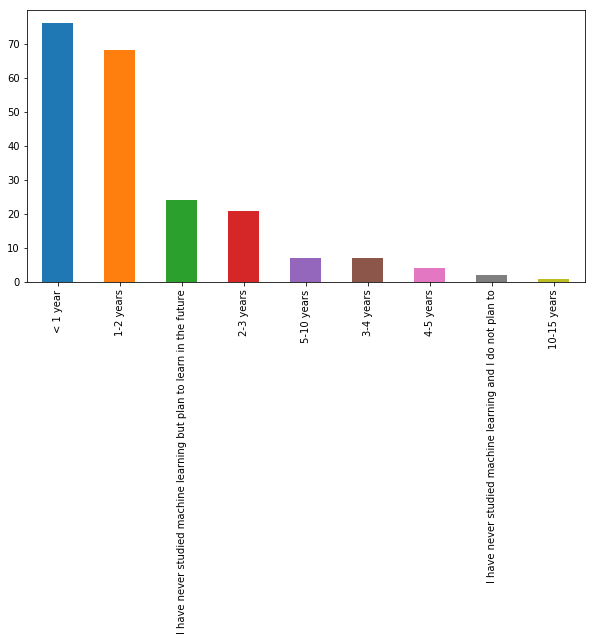

In [14]:

plot, ax = plt.subplots(1,figsize=(10,5))
grouped_stu_sal['Q25'].value_counts().plot.bar()
plt.show()

**After this, we want to explore what qualities for a good data scientist. Here, we define a "good" data scientist by the compesation they had. considering the averaged salary for data scientist is 91,476 (source: https://www.payscale.com/research/US/Job=Data_Scientist%2c_IT/Salary), we should add some deviation for the "elite" e.g. 75 percentile . So this amout is 100,000 **

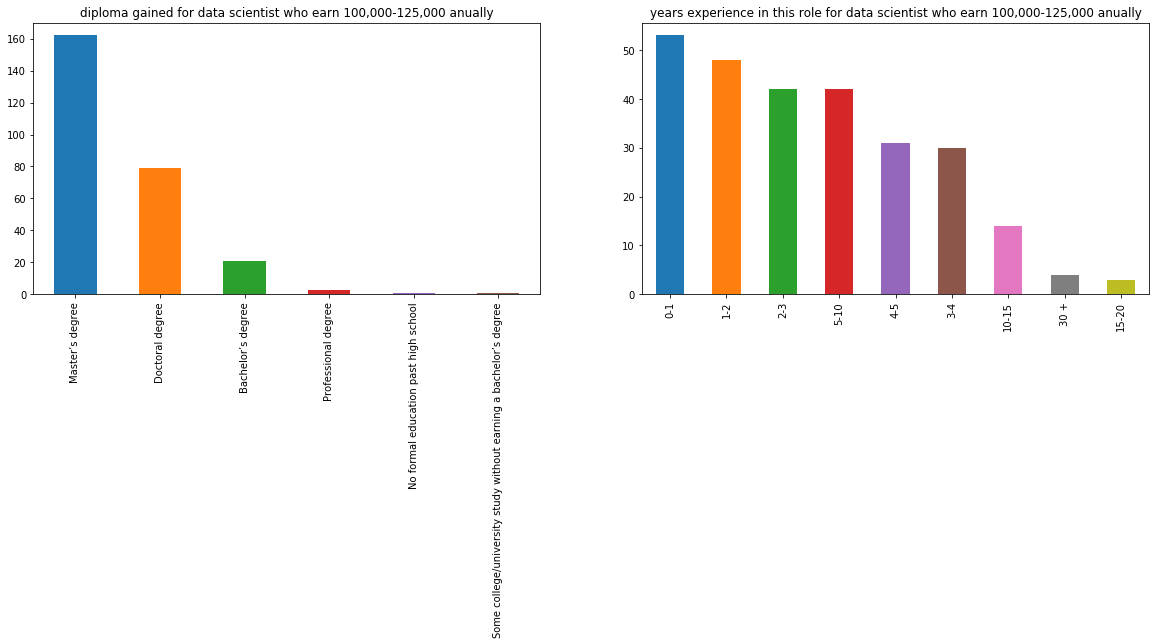

In [15]:
grouped_elite = get_group(multi_choice, 'Q9','100-125,000')
#see their diploma and yrs spent on this field to earn such money
grouped_elite_ds = get_group(grouped_elite, 'Q6','Data Scientist')
plot, axes = plt.subplots(1,2,figsize=(20,5))
grouped_elite_ds['Q4'].value_counts().plot.bar(ax=axes[0])
grouped_elite_ds['Q8'].value_counts().plot.bar(ax=axes[1])
axes[0].set_title("diploma gained for data scientist who earn 100,000-125,000 anually")

axes[1].set_title("years experience in this role for data scientist who earn 100,000-125,000 anually")

plt.show()

**which is quite interesting, most of these people gained more than 100K even in the first year. This directs us to the question, is years experience sharing positive relationship for the compesation? we will explore this later in the end. What we will do next is focusing on this group by now and to see what kind of language they use, what kind of platform they use.**

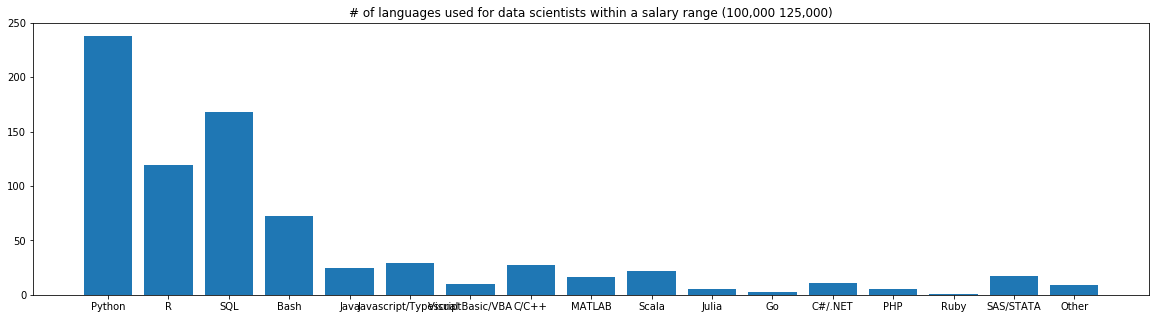

In [16]:
lag=[]
counts=[]
for i in range(18):
    counts.append(grouped_elite_ds[f'Q16_Part_{i+1}'].value_counts().values)
#     counts = [i if i else np.array([0]) for i in counts]
    lag.append(grouped_elite_ds[f'Q16_Part_{i+1}'].value_counts().index.values)
plt.figure(figsize=(20,5))
plt.bar(np.concatenate(lag), np.concatenate(counts))
plt.title('# of languages used for data scientists within a salary range (100,000 125,000)')
plt.show()
# print(type(lag), type(counts))

**Is language affecting the salary? we compare the top three widely used language python, R and SQL**

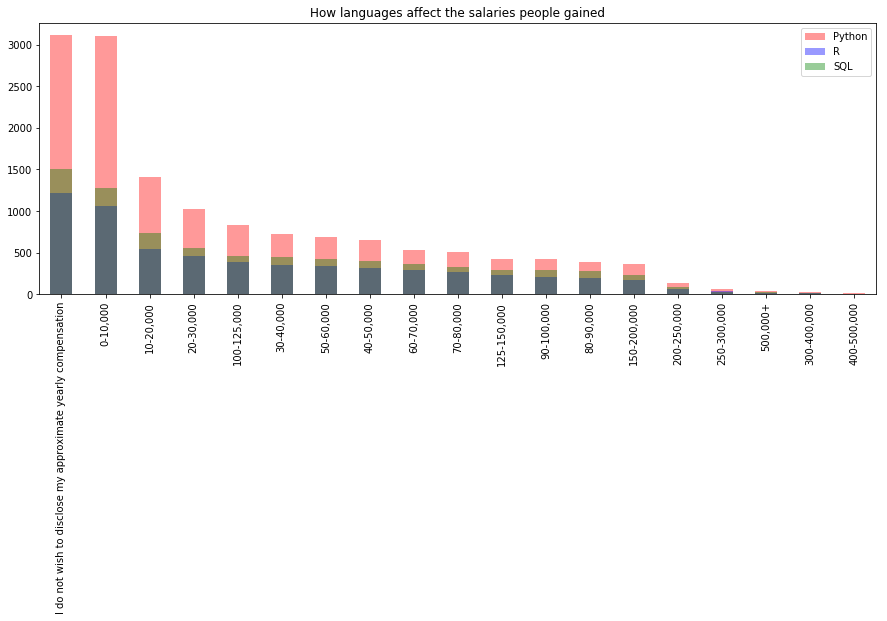

In [23]:
languages= ['Python', 'R', 'SQL']
colors = ['r','b','g']
plt.figure(figsize=(15,5))
for i in range(3):
    df = multi_choice[multi_choice[f'Q16_Part_{i+1}']==languages[i]]
    df['Q9'].value_counts().plot.bar(alpha=0.4, label=f'{languages[i]}',color=colors[i])
plt.title("How languages affect the salaries people gained")
plt.legend()
plt.show()

**Most of the beginers choose Python as a data analyzing language because of its smooth learning curve but as you gained more, the gap becomes more narrow. Therefore, we can infer that it does not matter what kind of language you use for the data analysis. **